In [45]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report as cr, confusion_matrix
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [46]:
data = pd.read_csv('mobil_listrik.csv')

# # Set display options to show more characters
# pd.set_option('display.max_colwidth', 30)
# pd.set_option('display.max_rows', None)

In [47]:
data

,id_komentar,nama_akun,tanggal,text,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif
5,Ugx-zVY4ktd7JNUB6xV4AaABAg,Syarif Airlangga,2023-08-04 06:58:17+00:00,harga motor mahal masa harga mirip motor beat ...,positif
6,Ugzu5Wkjya394dPHoq14AaABAg,BajuMax,2023-08-04 06:31:56+00:00,mol keren yah berita plus padahal mol loka...,negatif
7,Ugyy3luBOOHQspWyBiR4AaABAg,Putut Parwoto,2023-08-04 01:04:18+00:00,proses kenal produk baru butuh waktu ganti ken...,negatif
8,Ugw-fxD-u_9LFxhiRTp4AaABAg,Heru Prasetyo,2023-08-03 23:56:55+00:00,subsidi tepat sasar,netral
9,Ugx2k37YO1fch9eEM4d4AaABAg,jonan kick ass hole,2023-08-03 11:25:57+00:00,adil rata terima subsidi jangan jangan pajak p...,negatif


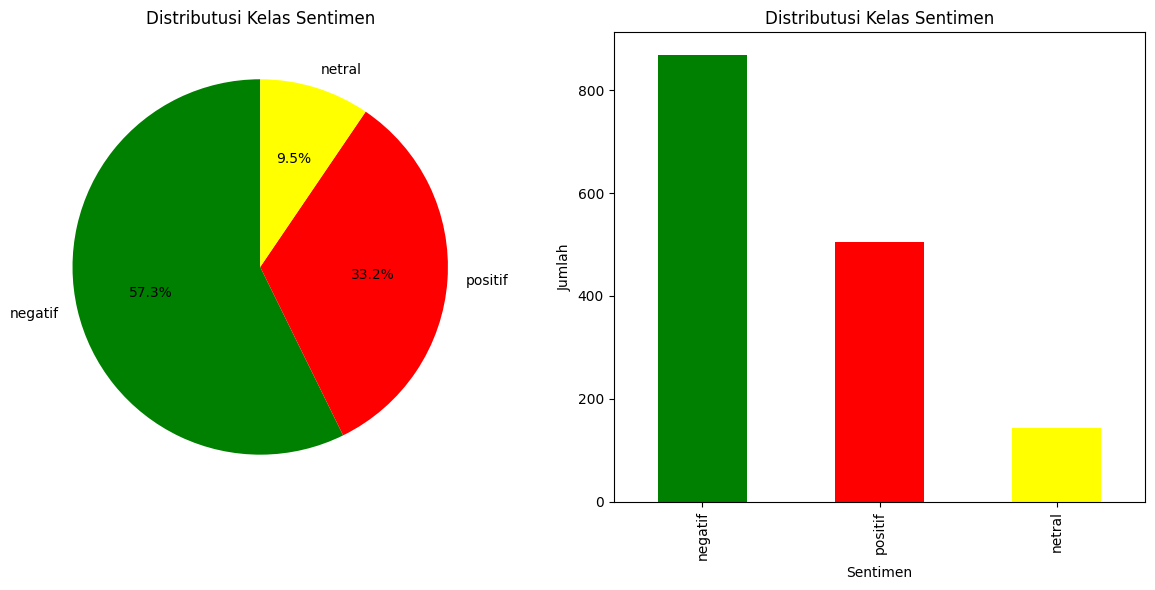

In [48]:
# Assuming 'data' is your DataFrame with a 'sentimen' column
sentimen_counts = data['sentimen'].value_counts()

# Create subplots with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart in the first subplot
axes[0].pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'yellow'])
axes[0].set_title('Distributusi Kelas Sentimen')

# Plot the bar chart in the second subplot
sentimen_counts.plot(kind='bar', ax=axes[1], color=['green', 'red', 'yellow'])
axes[1].set_title('Distributusi Kelas Sentimen')
axes[1].set_xlabel('Sentimen')
axes[1].set_ylabel('Jumlah')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [49]:
le = LabelEncoder()
data['sentimen'] = le.fit_transform(data['sentimen'])

review_positif = data[data['sentimen'] == 0]
review_negatif = data[data['sentimen'] == 1]
review_netral = data[data['sentimen'] == 2]

# Display only 'text' and 'sentimen' columns
print("20 Sampel review positif\n", review_positif[['text', 'sentimen']][:20])
print("\n20 Sampel review negatif\n", review_negatif[['text', 'sentimen']][:20])
print("\n20 Sampel review netral\n", review_netral[['text', 'sentimen']][:20])


20 Sampel review positif
                                                  text  sentimen
1   problem subsidi kualitas diturunin harga dinai...         0
3        model jelek kwalitas buruk harga mahal croot         0
4   syarat   ngaco woy anak muda   blom punya ruma...         0
6   mol keren yah   berita   plus padahal mol loka...         0
7   proses kenal produk baru butuh waktu ganti ken...         0
9   adil rata terima subsidi jangan jangan pajak p...         0
10    tepat sasar donk syarat belum tepat subsidi ...         0
11  mungkin subsidi baik arah   seragam sekolah bi...         0
13  banyak kenderaan buat tiongkok rekam bakar let...         0
15                                         tahan th           0
17             kendaran plg rawan bakar   mudah padam         0
18    buat hari   sih sangat guna     jalan jauh  ...         0
20            subsidi motor   jalan umum tolak system         0
21  apa sieh kok mbulet asli yo tiap spbu seluruh ...         0
22            

In [50]:
data['text'] = data['text'].fillna('')

# Case Folding

Case folding adalah salah satu bentuk text preprocessing yang paling sederhana dan efektif meskipun sering diabaikan. Tujuan dari case folding untuk mengubah semua huruf dalam dokumen menjadi huruf kecil. Hanya huruf ‘a’ sampai ‘z’ yang diterima. Karakter selain huruf dihilangkan dan dianggap delimiter.

In [51]:
def caseFolding(text):
    # Mengubah teks menjadi lowercase
    text = text.lower()
    
    # Menghapus whitespace
    text = ' '.join(text.split())
    
    return text

In [52]:
from IPython.display import display_json

# Set max_display_rows option
pd.set_option('display.max_rows', None)

# Apply case folding to the 'text' column
data['text'] = data['text'].apply(caseFolding)

# Display the 'text' column
display(data['text'])


0       saran sih bikin harga ionic sama kayak brio in...
1       problem subsidi kualitas diturunin harga dinai...
2       baik kualitas kembang dulu baik kualitas motor...
3            model jelek kwalitas buruk harga mahal croot
4       syarat ngaco woy anak muda blom punya rumah bl...
5       harga motor mahal masa harga mirip motor beat ...
6       mol keren yah berita plus padahal mol lokal me...
7       proses kenal produk baru butuh waktu ganti ken...
8                                     subsidi tepat sasar
9       adil rata terima subsidi jangan jangan pajak p...
10      tepat sasar donk syarat belum tepat subsidi ku...
11      mungkin subsidi baik arah seragam sekolah bila...
12      kampung sekarang banyak banget bocil sama cewe...
13      banyak kenderaan buat tiongkok rekam bakar let...
14                                    harga terlalu mahal
15                                               tahan th
16                                     iklan kudu kencang
17            

# Tokenizing 

Tokenizing adalah proses pemisahan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token. 

In [53]:
def Tokenized(text):
        
    # Menghapus angka
    text = re.sub(r"//t",r"\t",text)
    text = re.sub(r"( )\1+",r"\1",text)
    text = re.sub(r"(\n)\1+",r"\1",text)
    text = re.sub(r"(\r)\1+",r"\1",text)
    text = re.sub(r"(\t)\1+",r"\1",text)
    text = re.sub(r"(\d)\1+",r"\1",text)
    
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))

    # #Menghapus angka dan simbol
    # clean_spcl = re.compile('[/(){}\|@,;]')
    # clean_symbol = re.compile('[^0-9a-z]')
    # text = clean_spcl.sub('', text)
    # text = clean_symbol.sub(' ', text)
    
    return text

# Filtering (Hapus Stopword)

#### Filtering adalah tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting)  
#### Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna.

# Stemming

Stemming adalah proses menghilangkan infleksi kata ke bentuk dasarnya, namun bentuk dasar tersebut tidak berarti sama dengan akar kata (root word). Misalnya kata “mendengarkan”, “dengarkan”, “didengarkan” akan ditransformasi menjadi kata “dengar”.

In [54]:
# # Create a Stemmer instance
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# # Apply stemming to the 'text' column
# data['text'].apply(lambda x: stemmer.stem(x))

# Pembagian Data Train dan Data Test

In [55]:
x = data["text"]
y = data["sentimen"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Ekstrasi Fitur TF-IDF

In [56]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(x_train)
X_test_vectorized = vectorizer.transform(x_test)

In [57]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_vectorized, y_train)
svm_predictions = svm_classifier.predict(X_test_vectorized)

In [58]:
# Multinomial Naive Bayes (MNB)
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train_vectorized, y_train)
mnb_predictions = mnb_classifier.predict(X_test_vectorized)

In [59]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_vectorized, y_train)
dt_predictions = dt_classifier.predict(X_test_vectorized)

In [60]:
# Evaluate models
svm_accuracy = accuracy_score(y_test, svm_predictions)
mnb_accuracy = accuracy_score(y_test, mnb_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("SVM Accuracy:", svm_accuracy)
print("MNB Accuracy:", mnb_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

SVM Accuracy: 0.7730263157894737
MNB Accuracy: 0.6151315789473685
Decision Tree Accuracy: 0.6151315789473685
